In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
import json
import os
from collections import Counter
from datetime import datetime

In [3]:
history_files = []
for dirpath, _, filenames in os.walk("@history"):
    history_files = [os.path.join(dirpath, filename) for filename in filenames]
    break

In [4]:
channel_entries = {}
for history_file in history_files:
    channel_id = os.path.splitext(os.path.basename(history_file))[0]
    entries = channel_entries[channel_id] = Counter()
    with open(history_file, "r") as f:
        for entry in f:
            timestamp = int(json.loads(entry)["ts"].split(".")[0])
            timestamp = timestamp - timestamp % 86400 # round to nearest day
            entries[timestamp] += 1

In [5]:
def plot(entries_map):
    plt.figure(figsize=(30, 6 * len(entries_map)))
    for i, (title, entries) in enumerate(sorted(entries_map.items(), key=lambda item: item[0])):
        x, y = zip(*sorted(entries.items(), key=lambda entry: entry[0]))
        dates_x = [datetime.utcfromtimestamp(timestamp).date() for timestamp in x]
        plt.subplot(len(entries_map), 1, i + 1)
        plt.gca().grid(which="both")
        plt.title(title)
        plt.plot(dates_x, y)
        plt.xticks(dates_x, dates_x, rotation=90)
    plt.tight_layout()

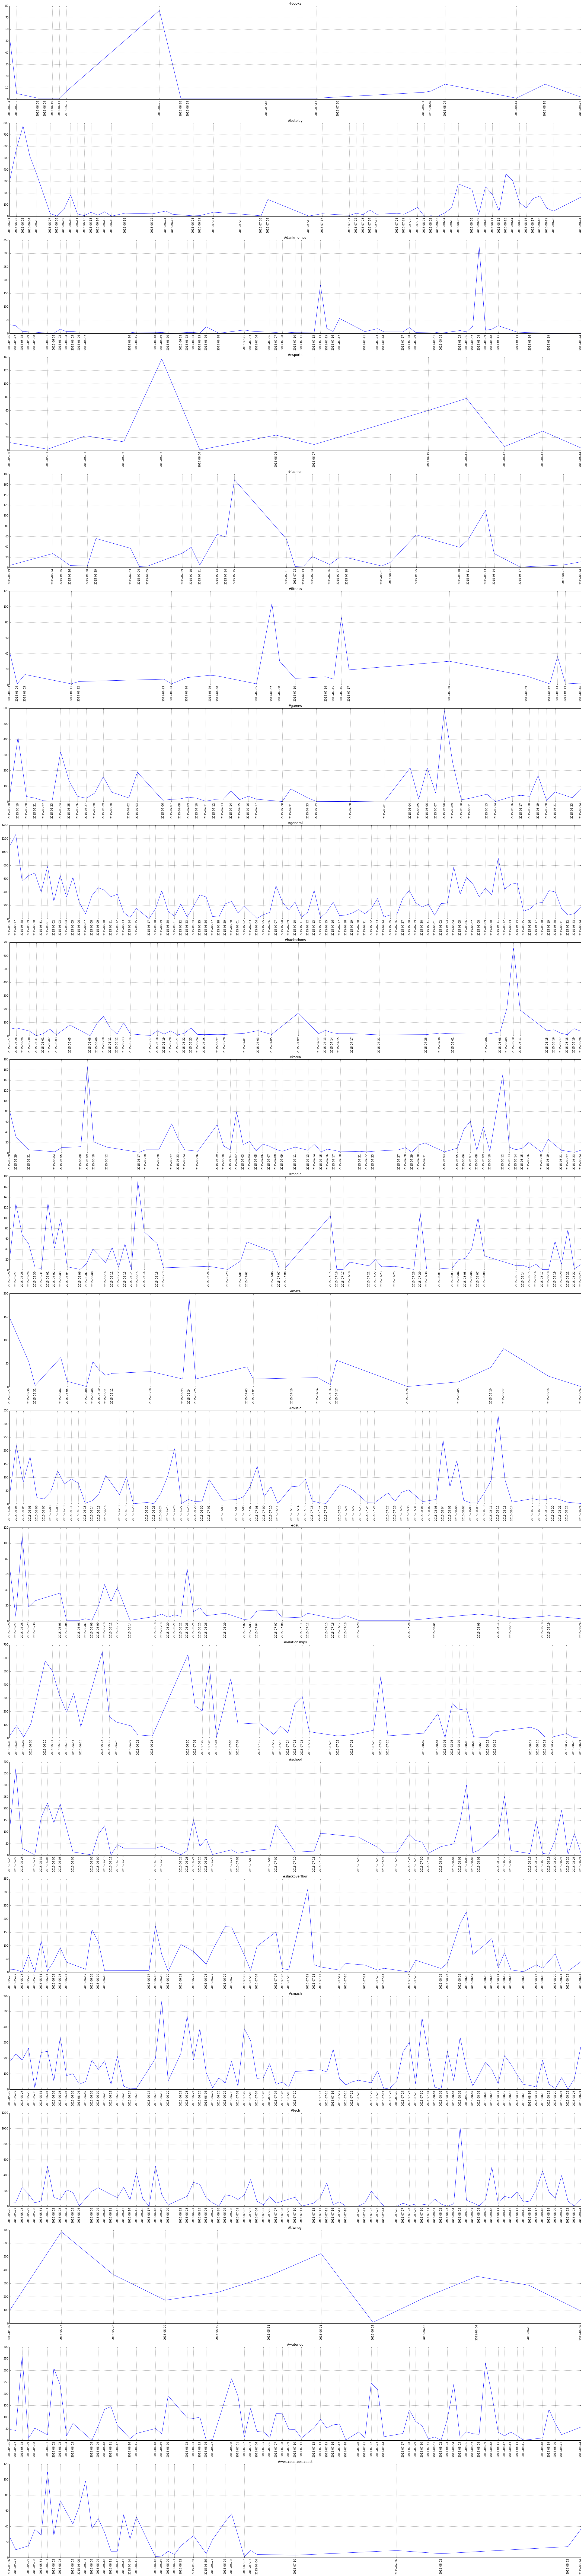

In [6]:
plot({k: v for k, v in channel_entries.items() if len(v) > 10}) # plot non-dead channels

22


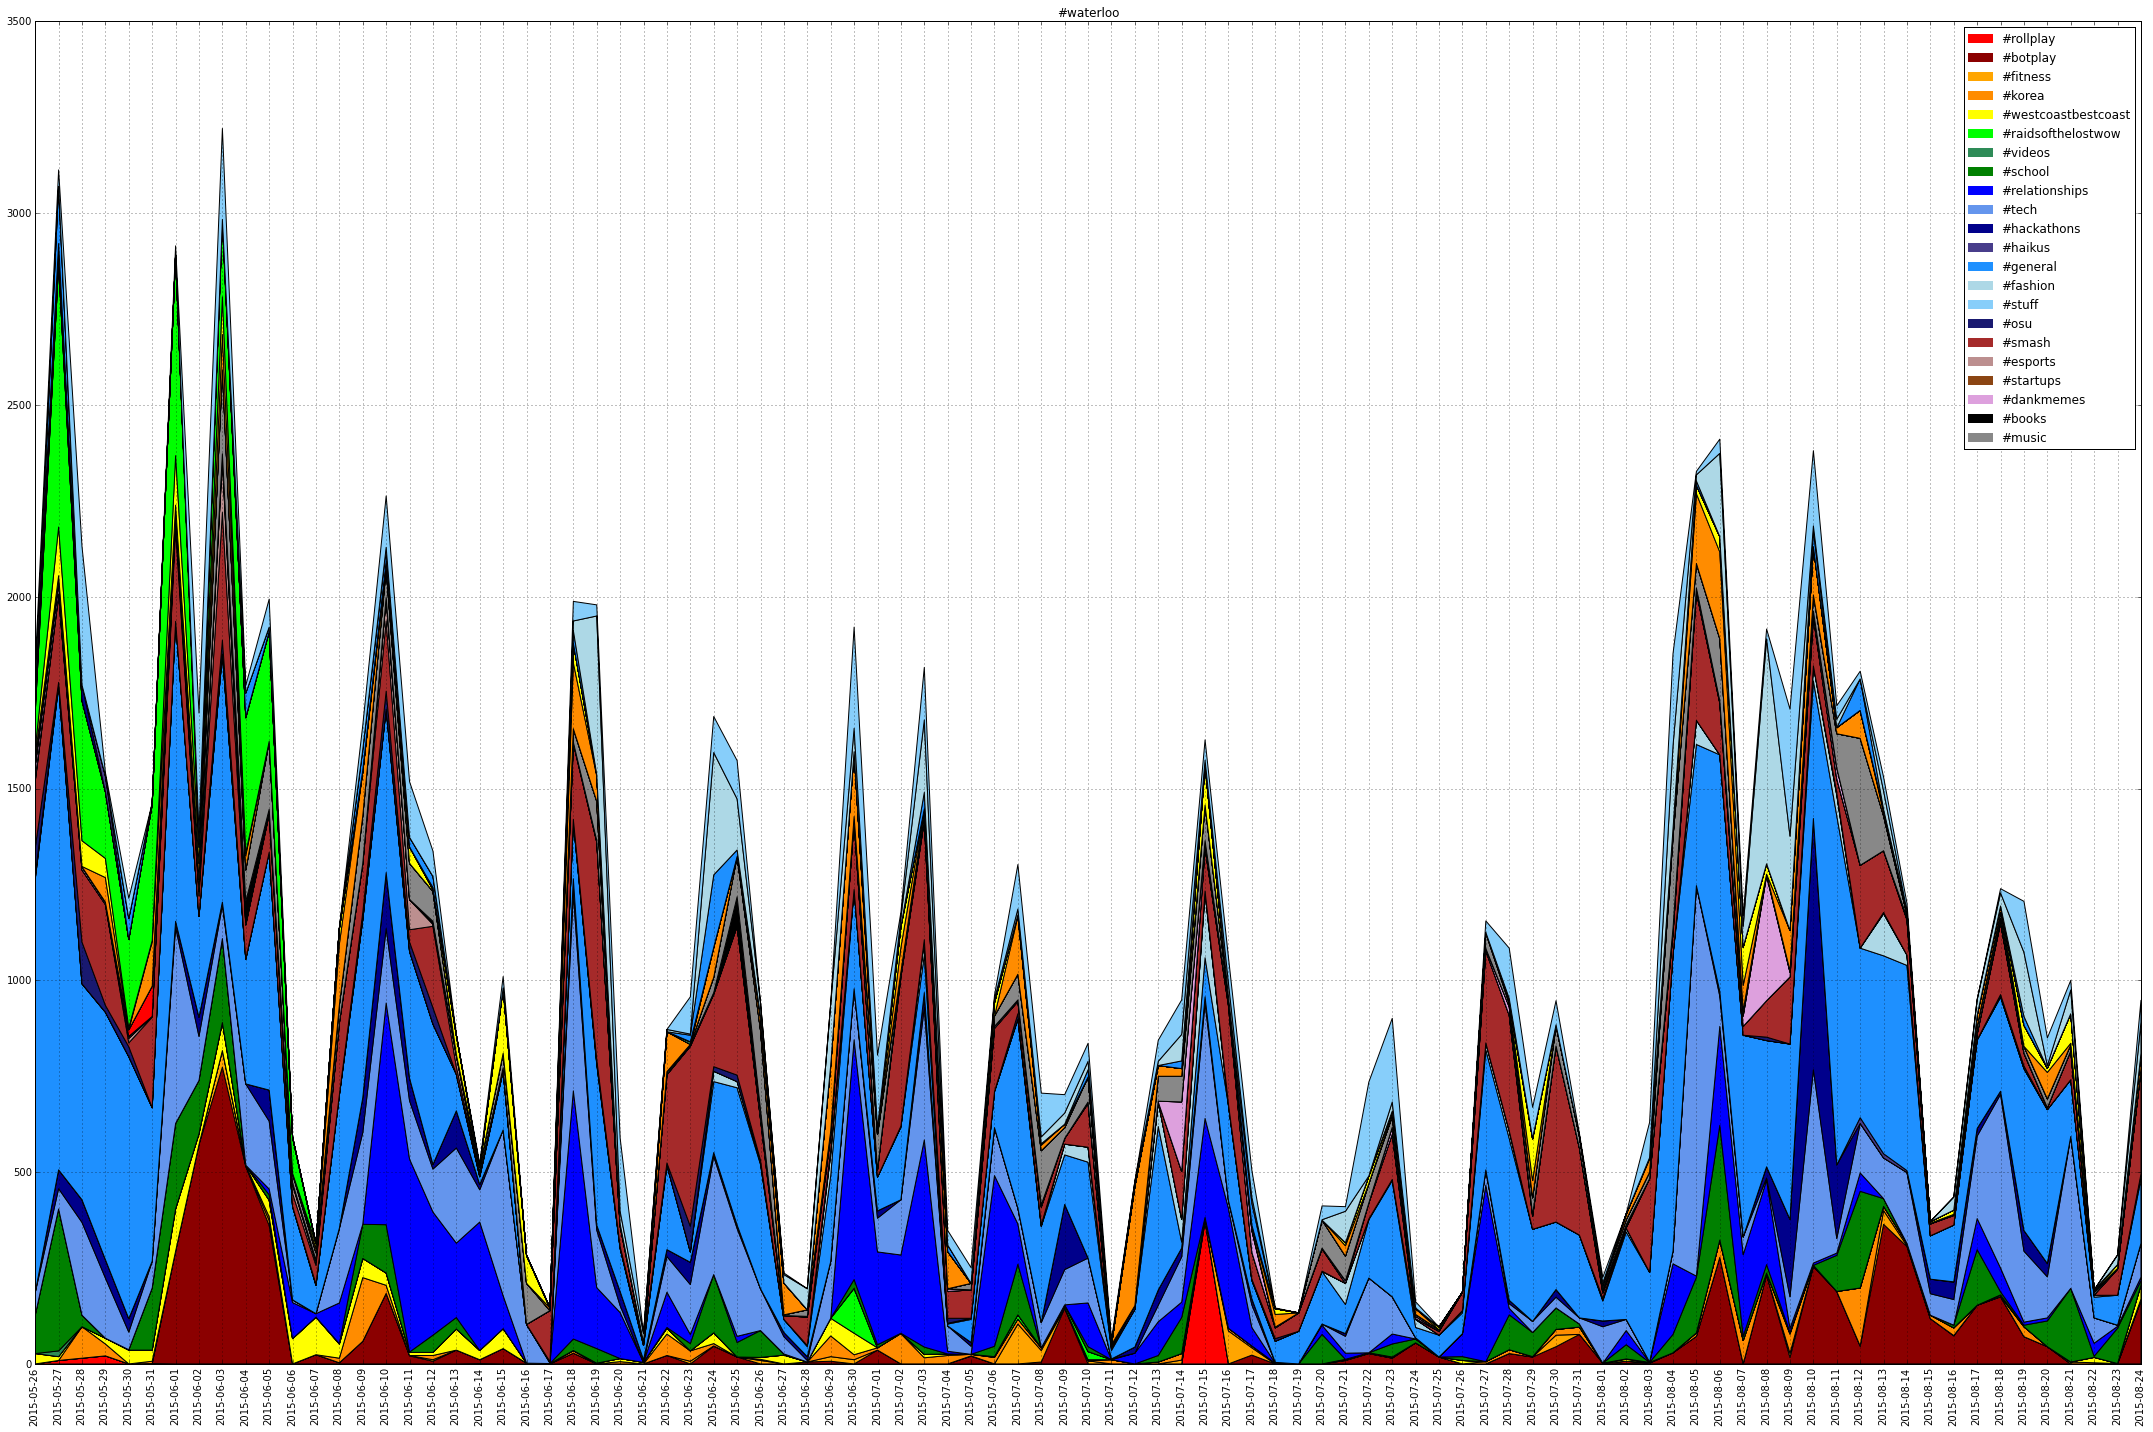

In [7]:
colors = [
    "#ff0000",
    "#8b0000",
    "#ffa500",
    "#ff8c00",
    "#ffff00",
    "#00ff00",
    "#2e8b57",
    "#008000",
    "#0000ff",
    "#6495ed",
    "#00008b",
    "#483d8b",
    "#1e90ff",
    "#add8e6",
    "#87cefa",
    "#191970",
    "#a52a2a",
    "#bc8f8f",
    "#8b4513",
    "#dda0dd",
    "#000000",
    "#888888",
]
print(len(colors))
plt.figure(figsize=(30, 20))
datasets = []
full_x = set()
for entries in channel_entries.values():
    if len(entries) < 10: continue
    full_x.update(entries.keys())
full_x = sorted(full_x)
titles = []
for title, entries in channel_entries.items():
    datasets.append([entries[date] for date in full_x])
    titles.append(title)
dates_x = [datetime.utcfromtimestamp(timestamp).date() for timestamp in full_x]
plt.gca().grid(which="both")
plt.title(title)
stackplot = plt.stackplot(dates_x, datasets, colors=colors)
plt.xticks(dates_x, dates_x, rotation=90)
plt.legend([mpatches.Patch(color=color) for color in colors[:len(titles)]], titles)
plt.tight_layout()